In [49]:
#Importing the data
import numpy as np
from numpy import set_printoptions

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline
set_printoptions(precision=3)

In [23]:
filename='indian_liver_patient.csv'
data=pd.read_csv(filename)
print(data.shape)
print('\n')
print(data.head()) # Dataset column -> selector field used to split the dataset into two

(583, 11)


   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.

In [24]:
data['Gender'].replace(['Female','Male'],[0,1],inplace=True)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [25]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [26]:
data['Albumin_and_Globulin_Ratio'].fillna(0, inplace = True)
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [27]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.940566,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.327962,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [28]:
print(data.groupby('Dataset').size())

Dataset
1    416
2    167
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB5C9BB128>,
      dtype=object)

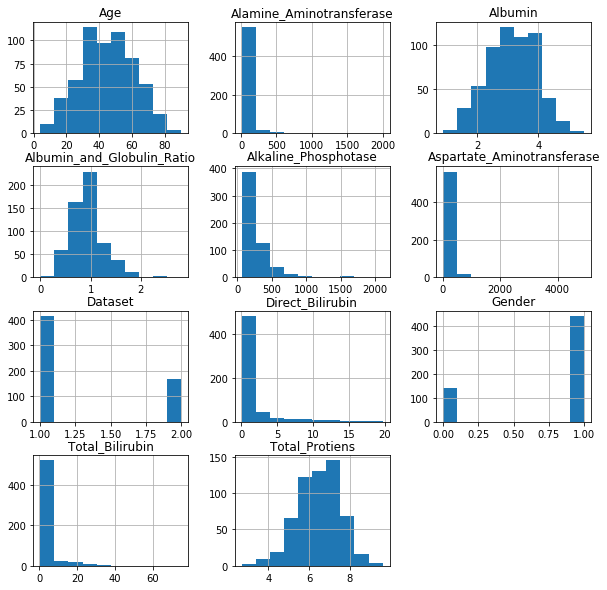

In [33]:
data.hist(figsize=(10,10))

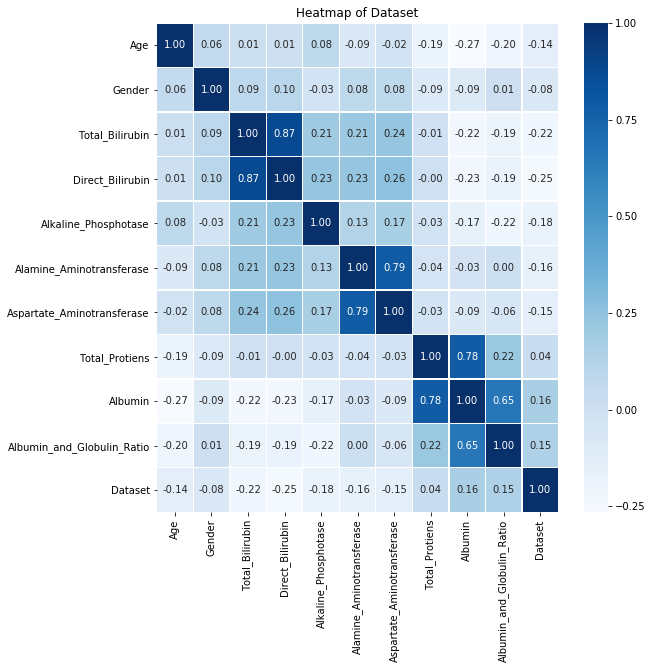

In [43]:
plt.figure(figsize=(9, 9))
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=0.3, cmap = 'Blues')
plt.title('Heatmap of Dataset')
plt.show()

In [45]:
array=data.values
x=array[:,0:10]
y=array[:,10]
scaler = StandardScaler().fit(x)
rescledX=scaler.fit_transform(x)
print(data.head())
print(rescledX[0:5,:])

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [46]:
array=data.values
x=array[:,0:10]
y=array[:,10]
normalize = Normalizer().fit(x)
normalizedX=normalize.fit_transform(x)
print(data.head())
print(normalizedX[0:5,:])

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [47]:
array=data.values
x=array[:,0:10]
y=array[:,10]
binarize = Binarizer().fit(x)
binarizeX=binarize.fit_transform(x)
print(data.head())
print(binarizeX[0:5,:])

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [10]:
filename='indian_liver_patient.csv'
data=read_csv(filename)
data['Gender'].replace(['Female','Male'],[0,1],inplace=True)
data.fillna(0,inplace=True)
array=data.values
x=array[:,0:10]
y=array[:,10]
test_size = 0.30
seed = 8

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
model=LogisticRegression()
model.fit(x_train, y_train)
result=model.score(x_test,y_test)
print("Accuracy: %.3f%%" %  (result*100.0))
predicted=model.predict(x_test)
report = classification_report(y_test,predicted)
print(report)
matrix = confusion_matrix(y_test,predicted)
print(matrix)

Accuracy: 71.429%
              precision    recall  f1-score   support

         1.0       0.74      0.93      0.82       126
         2.0       0.47      0.16      0.24        49

   micro avg       0.71      0.71      0.71       175
   macro avg       0.61      0.55      0.53       175
weighted avg       0.66      0.71      0.66       175

[[117   9]
 [ 41   8]]


C:\Users\kchai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from pandas import read_csv
filename='indian_liver_patient.csv'
data=read_csv(filename)
data['Gender'].replace(['Female','Male'],[0,1],inplace=True)
data.fillna(0,inplace=True)
array=data.values
x=array[:,0:10]
y=array[:,10]
test_size = 0.30
seed = 4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
model=SVC()
model.fit(x_train, y_train)
result=model.score(x_test,y_test)
print("Accuracy: %.3f%%" %  (result*100.0))
predicted=model.predict(x_test)
report = classification_report(y_test,predicted)
print(report)
matrix = confusion_matrix(y_test,predicted)
print(matrix)

Accuracy: 73.143%
              precision    recall  f1-score   support

         1.0       0.73      1.00      0.84       126
         2.0       1.00      0.04      0.08        49

   micro avg       0.73      0.73      0.73       175
   macro avg       0.86      0.52      0.46       175
weighted avg       0.80      0.73      0.63       175

[[126   0]
 [ 47   2]]


C:\Users\kchai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from pandas import read_csv
filename='indian_liver_patient.csv'
data=read_csv(filename)
data['Gender'].replace(['Female','Male'],[0,1],inplace=True)
data.fillna(0,inplace=True)
array=data.values
x=array[:,0:10]
y=array[:,10]
test_size = 0.30
seed = 4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)
result=model.score(x_test,y_test)
print("Accuracy: %.3f%%" %  (result*100.0))
predicted=model.predict(x_test)
report = classification_report(y_test,predicted)
print(report)
matrix = confusion_matrix(y_test,predicted)
print(matrix)

Accuracy: 65.714%
             precision    recall  f1-score   support

        1.0       0.75      0.79      0.77       126
        2.0       0.37      0.31      0.33        49

avg / total       0.64      0.66      0.65       175

[[100  26]
 [ 34  15]]


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from pandas import read_csv
filename='indian_liver_patient.csv'
data=read_csv(filename)
data['Gender'].replace(['Female','Male'],[0,1],inplace=True)
data.fillna(0,inplace=True)
array=data.values
x=array[:,0:10]
y=array[:,10]
test_size = 0.30
seed = 4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
model=GaussianNB()
model.fit(x_train, y_train)
result=model.score(x_test,y_test)
print("Accuracy: %.3f%%" %  (result*100.0))
predicted=model.predict(x_test)
report = classification_report(y_test,predicted)
print(report)
matrix = confusion_matrix(y_test,predicted)
print(matrix)

Accuracy: 50.286%
             precision    recall  f1-score   support

        1.0       0.93      0.33      0.49       126
        2.0       0.35      0.94      0.51        49

avg / total       0.77      0.50      0.50       175

[[42 84]
 [ 3 46]]
